<a href="https://colab.research.google.com/github/ThalesCavalcanti/MachineLearningGroundwork/blob/main/Parte_4_2_Agrupamento_Outros_algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Reconecte ao Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DRIVE_DIRECTORY = "curso_ml"
DRIVE_DIRECTORY = os.path.join("/content/drive/MyDrive/cursoML", DRIVE_DIRECTORY)

---

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Outros algoritmos

### Base de dados cobertura vegetal

Neste exercício você vai usar a base de dados de cobertura vegetal, explorada nos exercícios da **Parte 1 - Classificação**.

Comece carregando os dados do arquivo `cov_types.csv` armazenado na pasta do Drive.

In [4]:
base = pd.read_csv(os.path.join(DRIVE_DIRECTORY, "cov_types.csv"))

Remova as colunas categóricas, `Wilderness_Area` e `Soil_Type`.

In [5]:
base = base.drop(["Wilderness_Area", "Soil_Type"], axis=1)

Separe a coluna com a variável alvo `Cover_Type` em uma variável `y`.

In [6]:
y= base["Cover_Type"]

Separe as demais colunas em uma variável `X`, no formato de NumPy array.

In [7]:
X = base.iloc[:, :-1].values

Escalone os valores de `X` utilizando `StandardScaler`.

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


Agora gere um dendograma de `X`, utilizando `method=ward`. Exiba o dendrograma gerado.

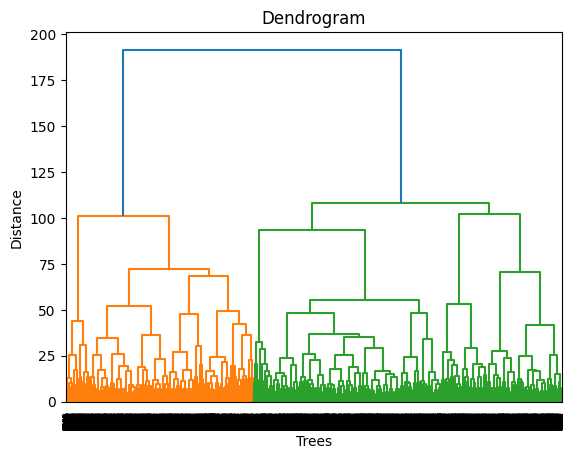

In [9]:
dendrogram = dendrogram(linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Trees")
plt.ylabel("Distance")
plt.show()

Agrupe os dados com `AgglomerativeClustering`, utilizando `n_clusters=7`,  `metric="euclidean"` e `linkage="ward"`. Recupere os rótulos com `fit_predict`.

In [10]:
agg = AgglomerativeClustering(n_clusters=7, metric="euclidean", linkage="ward")
labels = agg.fit_predict(X)

Vamos visualizar os dados junto com os rótulos gerados. Comece transformando `X` com a técnica de PCA, utilizando 2 componentes.

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


Plote o PCA, utilizando como argumento para cor os rótulos gerados pelo algoritmo, no formato de string.

In [12]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=labels.astype(str))
fig.show()

Compare os rótulos gerados com as classes originais.

In [13]:
pd.crosstab(y, labels)

col_0,0,1,2,3,4,5,6
Cover_Type,,,,,,,
Aspen,8,10,78,18,0,19,30
Cottonwood/Willow,0,1,30,0,3,13,8
Douglas-fir,0,13,111,2,92,26,34
Krummholz,25,95,108,66,9,24,35
Lodgepole Pine,820,866,1740,384,136,133,768
Ponderosa Pine,0,32,222,18,152,72,85
Spruce/Fir,655,697,1108,432,102,90,630


Novamente, se vê pouca correlação entre os rótulos.

Agora treine um algoritmo DBSCAN, com `eps=0.95` e `min_samples=2`.

In [14]:
dbscan = DBSCAN(eps=0.95, min_samples=2)
labels = dbscan.fit_predict(X)

Recupere os rótulos e exiba o gráfico de PCA.

In [15]:
labels = dbscan.labels_
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=labels.astype(str))
fig.show()

Veja que este algoritmo não utiliza o número de grupos como argumento, então ele pode gerar tantos grupos quanto julgue necessário. Além disso, ele cria um grupo chamado `-1` com os dados que ele considera que não fazem parte de nenhum grupo.